# Sequences and Series

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let us define a few sequences. 

## The geometric *Sequence* (not series!) $a_n = 1/n$

Below The call method is the one used when you use the class as if it were a function, as in classInstance = class(parameter1, parameter2) y=classInstance(x) That classInstance(x) executes the call method.

In [2]:
class harmonicSequence:
    def generateSequence(self):
        self._Sn = 1/np.arange(self._min, self._max) 
        # What happened here?
        # np.arange creates a numpy array filled with 1, 2, 3, ...,  self._max-1
        # 1/np.arange evaluates to an array filled with 1/1, 1/2, 1/3, ..., 1/(self._max-1)
        # That's generally how operations on numpy arrays work: element by element.

    def __init__(self, order=10):
        self._max=order + 1
        self._min=1
        self.generateSequence()

    def mini(self):
        return self._min
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn

Let's define a class to draw this:

In [3]:
def draw(mySeriousSeries, label=" ", labelposition="lower left", xlabel="n", ylabel="$S_n$", scale=1):
    nArray=np.arange(mySeriousSeries.mini(), mySeriousSeries.maxi())
    plt.plot(nArray,scale*mySeriousSeries(), label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=labelposition)

We define an instance of our sequence class:

In [4]:
n=10
harmonicSequenceArray = harmonicSequence(n)  

I'd also like to draw the limit. Now $\lim\limits_{n\to \infty} \frac{1}{n} = 0$, so to draw that into the plot as a straight line, I generate an array of zeroes.

In [5]:
harmonicLimitArray = np.zeros(10+1)

Now we are ready to draw it:

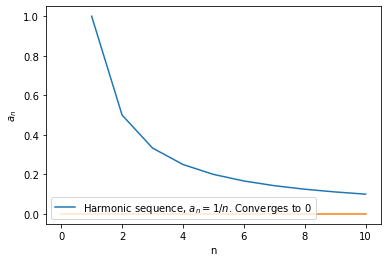

In [6]:
draw(harmonicSequenceArray, label="Harmonic sequence, $a_n = 1/n$. Converges to 0", ylabel="$a_n$")
plt.plot(harmonicLimitArray)
plt.show()

## The geometric series $S_n = a_0 \sum\limits_{k=0}^n q^n$ with $|q| < 1$

In [7]:
class geometricSeries:
    def generateSeries(self):
        su=0
        r=1
        for i in range(0, self._max):
            su += r
            self._Sn[i] = su
            r *= q
            
        self._Sn *= self._a
            
    def __init__(self, order=10, q=1/2, a0=1): # order corresponds to n in equation above
        self._max=order+1
        self._min=0
        self._q=q
        self._a=a0
        self._Sn = np.zeros(self._max - self._min)
        self.generateSeries()

    def mini(self):
        return self._min
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn



Now we define an instance of our harmonic series class with $q = \frac{1}{2}$ and $a_0=1$, so we calculate $S_n = \sum\limits_{k=0}^n \frac{1}{2^n}$.

In [8]:
n=10
q=1/2
a0=1.0
geometricSeriesArray = geometricSeries(n, q, a0)  
geometricLimitArray = np.ones(n+1)*a0/(1.0-q)

Let's draw it:

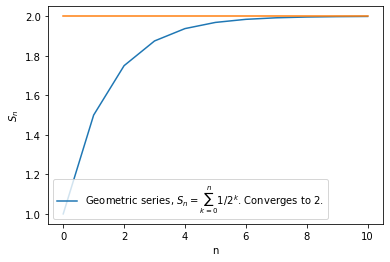

In [9]:
draw(geometricSeriesArray, label="Geometric series, $S_n =\sum_{k=0}^n 1/2^k$. Converges to 2.")
plt.plot(geometricLimitArray)
plt.show()

## The arithmetic series $S_n = a_0 + d\sum\limits_{k=1}^{n}k$ 
(diverges)

In [10]:
class arithmeticSeries:
    def generateSeries(self):
        su=self._a
        for i in range(self._min, self._max):
            self._Sn[i-self._min] = su
            su += d*i
            
    def __init__(self, order=10, a0=0, d=1): # order corresponds to n in equation above
        self._max=order+1
        self._min=1
        self._a=a0
        self._d=1
        self._Sn = np.zeros(self._max - self._min)
        self.generateSeries()

    def mini(self):
        return self._min
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn



Now we define an instance of our arithmetic series class with $a_0=0$ and $d=1$ so we calculate $S_n = \sum\limits_{k=1}^n k$.

In [11]:
n=10
a0=1.0
d=1
arithmeticSeriesArray = arithmeticSeries(n, a0, d)  

Let's draw it:

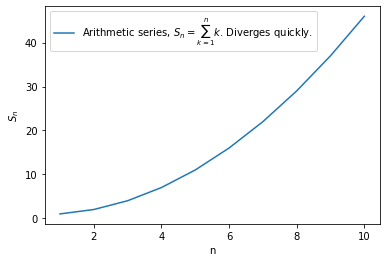

In [12]:
draw(arithmeticSeriesArray
     , label="Arithmetic series, $S_n =\sum_{k=1}^n k$. Diverges quickly."
     , labelposition="upper left")
plt.show()

## Alternating harmonic series, $S_n = \sum\limits_{k=1}^n (-1)^{(n+1)} \frac{1}{k}$

In [13]:
class alternatingHarmonicSeries:
    def generateSeries(self):
        i=1
        sum=0
        for k in range(self._min, self._max): 
            sum += i/k
            self._Sn[k-self._min] = sum  # I'm filling the kth element into the k-1st position of the numpy array, whose indexing starts at zero
            i*=-1

    def __init__(self, order=10): # order corresponds to n in equation above
        self._max=order+1
        self._min=1
        self._Sn = np.zeros(self._max - self._min)
        self.generateSeries()

    def mini(self):
        return self._min
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn



Let's create an instance of it (and one for the limit)

In [14]:
n=30
alternatingHarmonicArray = alternatingHarmonicSeries(n)  
alternatingHarmonicLimitArray = np.ones(n+1)*np.math.log(2)

and draw it

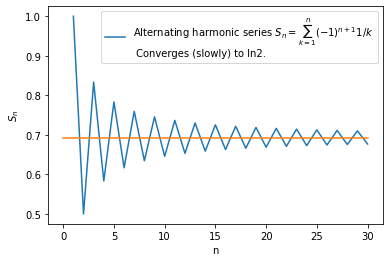

In [15]:
draw(alternatingHarmonicArray
     , label="Alternating harmonic series $S_n=\sum_{k=1}^n (-1)^{n+1}1/k$\n Converges (slowly) to ln2."
     , labelposition="upper right")
plt.plot(alternatingHarmonicLimitArray)
plt.show()

## The (diverging) harmonic series, $S_n = \sum\limits_{k=1}^n \frac{1}{k}$

In [16]:
class harmonicSeries:
    def generateSeries(self):
        sum=0
        for k in range(self._min, self._max): 
            sum += 1/k
            self._Sn[k-self._min] = sum  # I'm filling the kth element into the k-1st position of the numpy array, whose indexing starts at zero

    def __init__(self, order=10):
        self._max=order+1
        self._min=1
        self._Sn = np.zeros(self._max - self._min)
        self.generateSeries()

    def mini(self):
        return self._min
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn



Let's create an instance of it (and one for the limit)

In [17]:
n=100
harmonicArray = harmonicSeries(n)  

and draw it

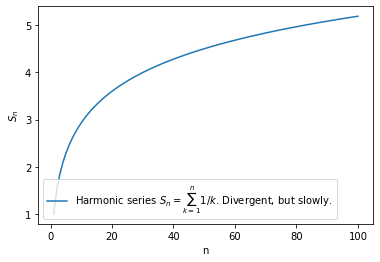

In [18]:
draw(harmonicArray, label="Harmonic series $S_n = \sum_{k=1}^n 1/k$. Divergent, but slowly.")
plt.show()

Note that on a computer, the series will *appear* to converge because the computer can only store a finite number of digits (typically about 16 decimal digits in double precision), and at some point, for very large $n$, $S_{n+1} = S_{n} + \frac{1}{n+1}$ will be approximated as $S_n$ due to the rounding error. Maybe you can find out when this happens on your computer. It will require a fast computer and a bit of patience as you'll need to get to (or near) $\frac{S_n}{1/n} = n S_n \approx 10^{16}$. The maximum I managed to do on my computer in a reasonable time was $n=10^8, nS_n\approx 10^9$. For that, the computer's accuracy is still good enough.

## The series $\sum\limits_{k=0}^n \frac{1}{k!}$

In [19]:
class expoSeries:
    def generateSeries(self):
        a=1.0
        su=1.0
        self._Sn[0]=su
        for n in range(1, self._max):
            a*=self._x/n
            su+=a
            self._Sn[n]=su
            
    def __init__(self, order=10, x=1):
        self._max=order+1
        self._min=0
        self._x=x
        self._Sn = np.zeros(self._max - self._min)
        self.generateSeries()

    def mini(self):
        return 0
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn
    

Let's create an instance of it (and one for the limit)

In [20]:
n=10
expoArray = expoSeries(n)  
expoLimitArray = np.ones(n+1)*np.exp(1) # this series converges to e

and draw it

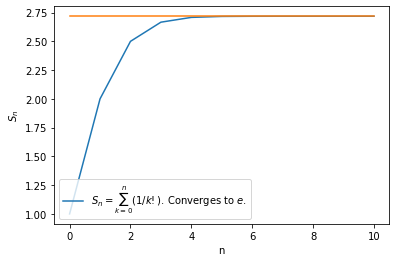

In [21]:
draw(expoArray, label="$S_n = \sum_{k=0}^n (1/k!)$. Converges to $e$.")
plt.plot(expoLimitArray)
plt.show()

## The sequence $a_n = \left(1 + \frac{1}{n}\right)^n$
This seqence, just like the series above, converges to $e$, but much more slowly.

In [22]:
class slowExpSequence:
    def generateSequence(self):
        n = np.arange(self._min, self._max)
        self._Sn = (1 + 1/n)**n

    def __init__(self, order=10):
        self._max=order + 1
        self._min=1
        self.generateSequence()

    def mini(self):
        return self._min
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn



Let's create an instance of the slow, the fast and the limit of the series/sequence that converge to an exponential

In [23]:
n=10
slowExpoArray = slowExpSequence(n)
fastExpoArray = expoSeries(n)  
expoLimitArray = np.ones(n+1)*np.exp(1) 

and let's draw it into the same plot as the fast one.

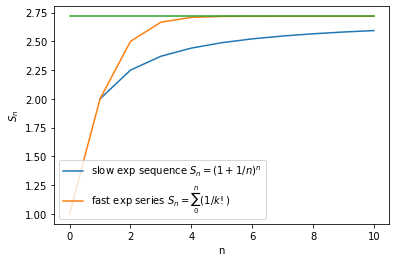

In [24]:
draw(slowExpoArray, label="slow exp sequence $S_n=(1+1/n)^n$")
draw(fastExpoArray, label="fast exp series $S_n=\sum_0^n(1/k!)$")
plt.plot(expoLimitArray)
plt.show()

## Power series, $S_n = \sum\limits_{k=1}^n \frac{1}{k^p}$
Converges for $p > 1$ (for p=1, it's the same as the harmonic array we've looked at above).
Its limit is called the Rieman zeta function, $\zeta(p)=\sum\limits_{k=1}^{\infty} \frac{1}{k^p}$. (In that context, $p$ is generally a complex variable with $\mathrm{Re}(p) > 1$, but here, we'll keep it real.)

In [25]:
class powerSeries:
    def generateSeries(self):
        sum=0
        for k in range(self._min, self._max): 
            sum += 1/(k**self._power)
            self._Sn[k-self._min] = sum  # I'm filling the kth element into the k-1st position of the numpy array, whose indexing starts at zero

    def __init__(self, order=10, power=2):
        self._max=order+1
        self._min=1
        self._power = power
        self._Sn = np.zeros(self._max - self._min)
        self.generateSeries()

    def mini(self):
        return self._min
    def maxi(self):
        return self._max
    
    def __call__(self):
        return self._Sn



### $S_n = \sum\limits_{k=1}^n \frac{1}{k^2}$
This converges to $\zeta(2) = \lim\limits_{n\to\infty} \sum\limits_{k=1}^n \frac{1}{k^2} = \frac{\pi^2}{6}$.

Let's create an instance of this series, and an array for plotting the limit.

In [26]:
n=30
inverseSquareArray = powerSeries(n, 2)  
inverseSquareLimitArray = np.ones(n+1)*np.math.pi**2/6

and draw it

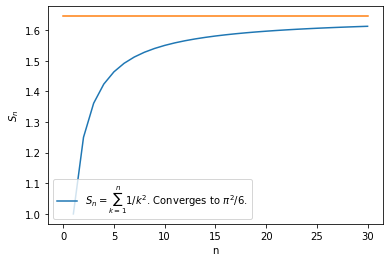

In [27]:
draw(inverseSquareArray, label="$S_n = \sum_{k=1}^n 1/k^2$. Converges to $\pi^2/6$.")
plt.plot(inverseSquareLimitArray)
plt.show()

### $S_n = \sum\limits_{k=1}^{n} \frac{1}{k^3}$ 
This converges to $\zeta(3) = \sum\limits_{k=1}^{\infty} \frac{1}{k^3}=1.2020569031595942853997\ldots$, known as Apéry's constant (https://en.wikipedia.org/wiki/Ap%C3%A9ry%27s_constant)

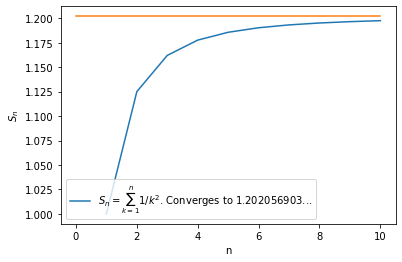

In [28]:
n=10
RiemanZeta3Array = powerSeries(n, 3)
RiemanZeta3LimitArray = np.ones(n+1)*1.202056903159594285399738161511449990764986292
draw(RiemanZeta3Array, label="$S_n = \sum_{k=1}^n 1/k^2$. Converges to 1.202056903...")
plt.plot(RiemanZeta3LimitArray)
plt.show()